![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [14]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g       sex
0         -0.903906         0.790360          -1.425342    -0.566948  0.993994
1         -0.830434         0.126187          -1.068577    -0.504847 -1.006042
2         -0.683490         0.432728          -0.426399    -1.187953 -1.006042
3         -1.344738         1.096901          -0.569105    -0.939551 -1.006042
4         -0.867170         1.761074          -0.783164    -0.691149  0.993994


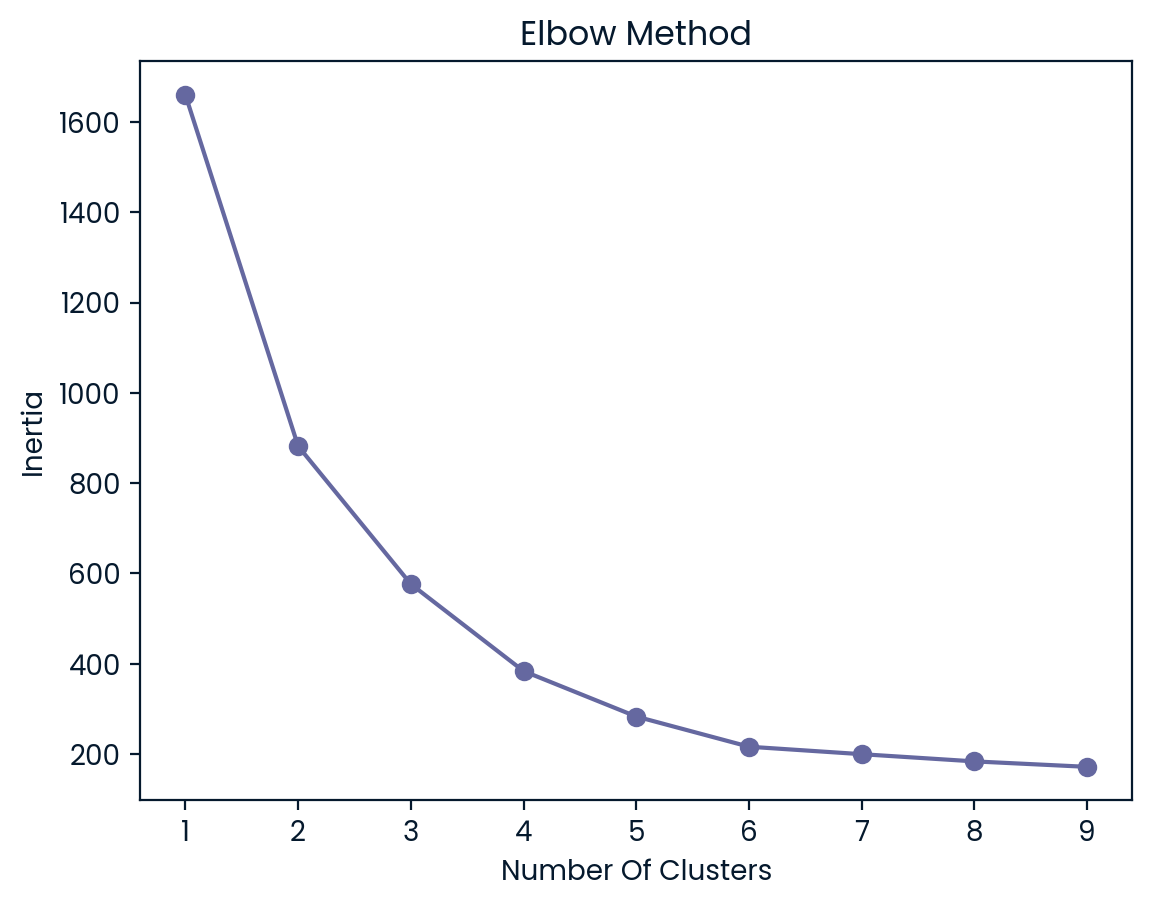

In [15]:
# Identify Missing Values
print(penguins_df.isna().sum().sort_values())

# Convert to one-hot encoding
penguins = pd.get_dummies(penguins_df,drop_first=True,dtype='int')

# Scale Data
scaler = StandardScaler()
X = scaler.fit_transform(penguins)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
print(penguins_preprocessed.head())

# Print out inertias
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)

# Find best number of clusters to choose    
plt.plot(range(1,10),inertia,marker='o')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


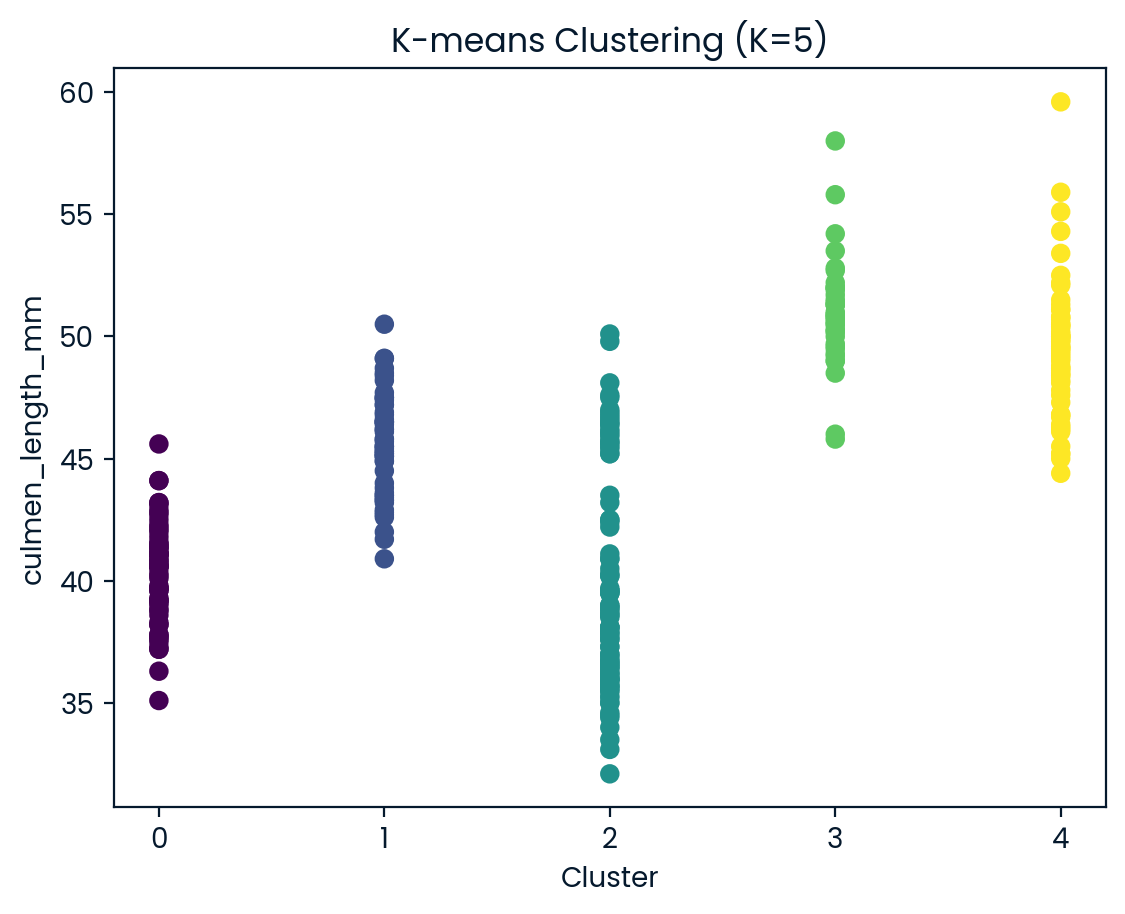

In [16]:
from sklearn.cluster import KMeans

# Fit clusters into the KMeans model
kmeans = KMeans(n_clusters = 5, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K=5)')
plt.show()

In [17]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,40.315714,19.011429,192.242857
1,45.563793,14.237931,212.706897
2,39.744660,17.588350,188.864078
3,50.965000,19.195000,199.075000
4,49.473770,15.718033,221.540984
